In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
sigorta = pd.read_csv("insurance.csv")

In [4]:
print("--"*500)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 1 - EDA ( Explotary Data Analysis )

## 1.1 First Look

In [5]:
sigorta.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
sigorta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
sigorta.shape

(1338, 7)

In [8]:
sigorta.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 1.2 Visualizing Data

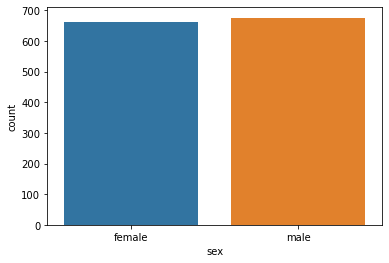

In [9]:
sns.countplot(x = "sex", data = sigorta)
plt.show()

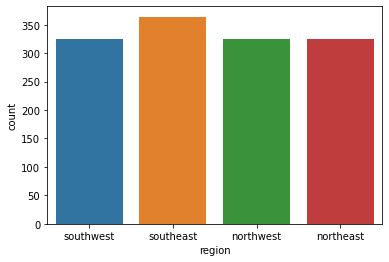

In [10]:
sns.countplot(x="region", data=sigorta)
plt.show()

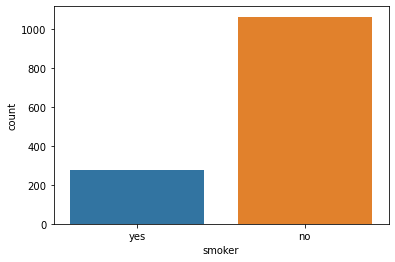

In [11]:
sns.countplot(x="smoker", data=sigorta)
plt.show()

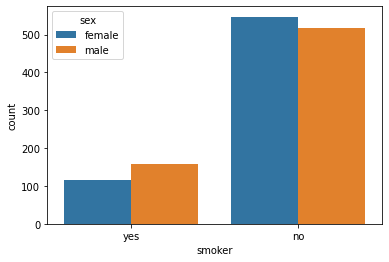

In [12]:
sns.countplot(x="smoker",data=sigorta,hue="sex")
plt.show()

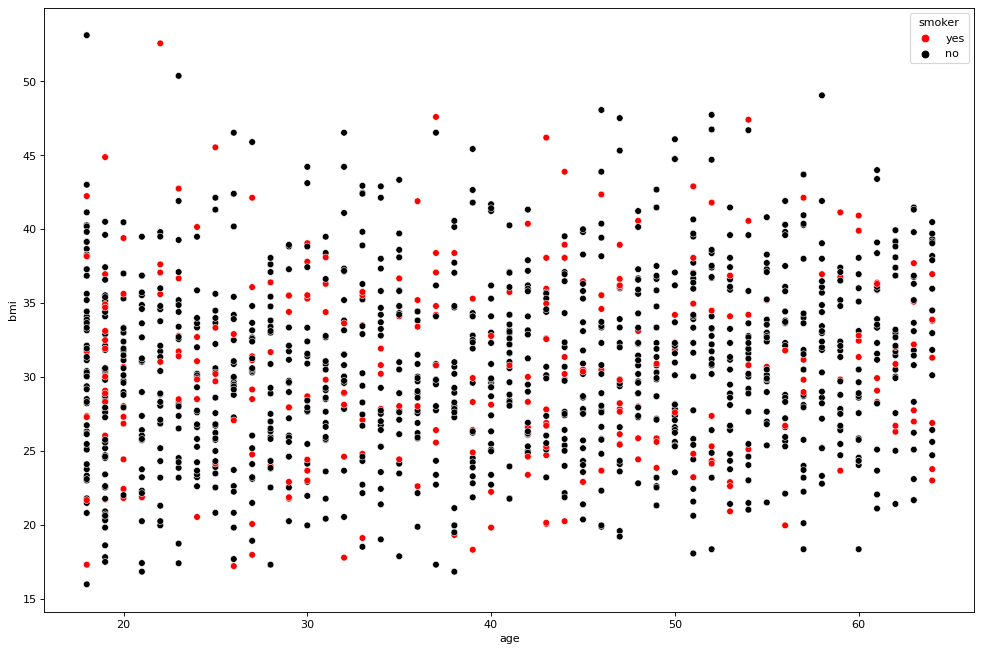

In [13]:
plt.figure(figsize=(15,10),dpi=80)
hue_colors = {"yes":"red","no":"black"}
sns.scatterplot(x="age",y="bmi",data=sigorta,hue="smoker",palette=hue_colors)
plt.show()

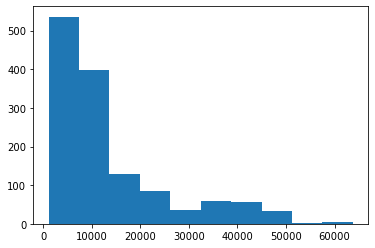

In [14]:
plt.hist(sigorta["charges"])
plt.show()

Categorical variables should be converted to numerics. To do that we need "get_dummies" method

# Linear Regression with Only Dummies

In [15]:
sigorta["is_women"] = pd.get_dummies(sigorta["sex"],drop_first=True)

In [16]:
sigorta.head()

,age,sex,bmi,children,smoker,region,charges,is_women
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [17]:
sigorta["is_smoker"] = pd.get_dummies(sigorta["smoker"],drop_first=True)

In [18]:
sigorta.head()

,age,sex,bmi,children,smoker,region,charges,is_women,is_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


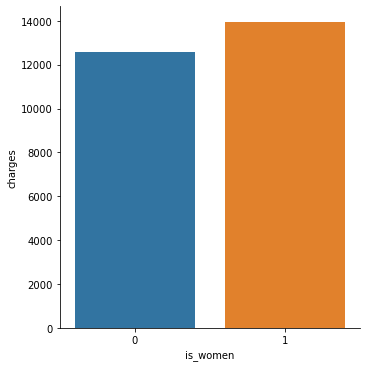

In [19]:
sns.catplot(x="is_women", y="charges", data=sigorta, kind="bar",ci=None) #ci=None remoww lines
plt.show()

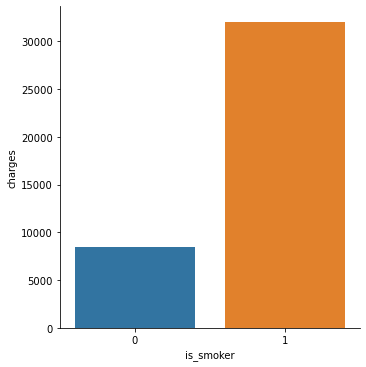

In [20]:
sns.catplot(x="is_smoker", y="charges", data=sigorta, kind="bar", ci=None)
plt.show()

# Modelling

In [21]:
from sklearn import linear_model

In [22]:
Y = sigorta["charges"]
X = sigorta[["is_women","is_smoker"]]

In [23]:
lrm = linear_model.LinearRegression()
lrm.fit(X,Y)

LinearRegression()

In [24]:
print("Variables coefficients: \n ", lrm.coef_)
print("Constant: \n ", lrm.intercept_)

Variables coefficients: 
  [  -65.37843464 23622.1345855 ]
Constant: 
  8466.03582671678


In [25]:
import statsmodels.api as sm

X = sm.add_constant(X) #Stats models fit() function does not add constant like sckit-learn
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1088.
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          4.78e-281
Time:                        09:51:25   Log-Likelihood:                -13831.
No. Observations:                1338   AIC:                         2.767e+04
Df Residuals:                    1335   BIC:                         2.768e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8466.0358    303.541     27.891      0.000    7870.566    9061.506
is_women     -65.3784    409.809     -0.160      0.873    -869.318     738.561
is_smoker   2.362e+04    507.736     46.524      0.000    2.26e+04    2.46e+04
==============================================================================
Omnibus:                      135.842   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.897
Skew:                           0.727   Prob(JB):                     9.71e-47
Kurtosis:                       4.299   Cond. No.                         2.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### R2 value is too low, %62. We need to add new other variables to model.

In [2]:
print("--"*500)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Linear Regression with multiple Variables

In [30]:
Y = sigorta["charges"]
X = sigorta[["is_women","is_smoker","age","bmi"]]

In [31]:
X = sm.add_constant(X)

In [32]:
sonuclar = sm.OLS(Y,X).fit()
sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     986.5
Date:                Thu, 28 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:56:35   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1333   BIC:                         2.715e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.163e+04    947.267    -12.281      0.000   -1.35e+04   -9775.198
is_women    -109.0411    334.665     -0.326      0.745    -765.568     547.486
is_smoker   2.383e+04    414.186     57.544      0.000     2.3e+04    2.46e+04
age          259.4532     11.942     21.727      0.000     236.027     282.880
bmi          323.0511     27.529     11.735      0.000     269.046     377.056
==============================================================================
Omnibus:                      299.394   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              708.639
Skew:                           1.212   Prob(JB):                    1.32e-154
Kurtosis:                       5.614   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""